<a href="https://colab.research.google.com/github/bforoura/IDS/blob/main/Portuguese_Bank_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Direct Marketing Campaign of a Portuguese Bank**

* The data is related to  direct marketing campaigns of a Portuguese banking institution. 
* The  campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
* bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010)
* Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing
* **Classification goal:** Predict if the client will subscribe (yes/no) a term deposit (variable y)

#============================================ 

## **Input Variables:**

### Bank client data:
1. **age** (numeric)
2. **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **housing**: has housing loan? (categorical: 'no','yes','unknown')
7. **loan**: has personal loan? (categorical: 'no','yes','unknown')
### Related with the last contact of the current campaign:
8. **contact**: contact communication type (categorical: 'cellular','telephone')
9. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### Other attributes:
12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## Social and economic context attributes
16. **emp.var.rate**: employment variation rate is the coefficient of variation of regional employment rates in a country, weighted by the absolute population (active population) of each region. - quarterly indicator (numeric)
17. **cons.price.idx**: consumer price index is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods- monthly indicator (numeric)
18. **cons.conf.idx**: consumer confidence index indicates economic growth in which consumers are spending money, indicating higher consumption.- monthly indicator (numeric)
19. **euribor3m**: The Euro Interbank Offered Rate (Euribor) is a daily reference rate, published by the European Money Markets Institute, based on the averaged interest rates (numeric)
20. **nr.employed**: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')




# **The Objectives of This Analysis**

* Learn about our potential customers. That is, learn the characteristics of those who choose to bank with us, as well as those who do not.
* Develop a profitable method of identifying likely positive responders, so that we may save time and money. That is, **develop a model or models that will identify likely positive responders.** 
* Quantify the expected profit from using these models.

In [72]:
# Let's read in the data file

import pandas as pd

bank_data = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/bank-additional-full.csv")





In [73]:
# Summarize the numeric attributes

bank_data.describe()



,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_dx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## **Accessing Rows**

In [74]:
# The first 10 rows

bank_data.head(10)



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_dx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **Accessing Rows and Columns in DataFrames**


* **DataFrame.loc**: Access a group of rows and columns by labels.
* **DataFrame.iloc**: Access group of rows and columns by integer position(s).
* **DataFrame.at**: Access a single value for a row/column label pair.

* etc.

In [75]:
# row 0

# same as bank_data.iloc[0,:]
bank_data.iloc[0,]



age                        56
job                 housemaid
marital               married
education            basic.4y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  261
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp_var_rate              1.1
cons_price_idx         93.994
cons_conf_dx            -36.4
euribor3m               4.857
nr_employed            5191.0
y                          no
Name: 0, dtype: object

In [76]:
# row 0, column 0

bank_data.iloc[0,0]




56

In [77]:
# row 0, the target column

bank_data.loc[0].at['y']




'no'

In [78]:
# column 1, all rows

bank_data.iloc[:, 1]



0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41188, dtype: object

In [79]:
# column 3, first few rows

bank_data.iloc[0:5, 3]



0       basic.4y
1    high.school
2    high.school
3       basic.6y
4    high.school
Name: education, dtype: object

In [80]:
# column 3, first few rows

bank_data.loc[0:5, 'education']




0       basic.4y
1    high.school
2    high.school
3       basic.6y
4    high.school
5       basic.9y
Name: education, dtype: object

In [81]:
# Display the first row, first 4 columns

import numpy as np

np.array(bank_data)[0, 0:4]




array([56, 'housemaid', 'married', 'basic.4y'], dtype=object)

## **Sorting Columns**

In [82]:
# Sort by the first column; only display the first 5 rows and first 6 columns

bank_data.sort_values(by=['age'], ascending=True).iloc[0:5, 0:6]



,age,job,marital,education,default,housing
38274,17,student,single,unknown,no,no
37579,17,student,single,basic.9y,no,unknown
37539,17,student,single,basic.9y,no,yes
37140,17,student,single,unknown,no,yes
37558,17,student,single,basic.9y,no,yes


In [83]:
# Sort by the first three columns, if possible at all 
# Display the first few rows and three columns

bank_data.sort_values(['age', 'job', 'marital'], 
                       ascending = (False, True, True)).iloc[0:10, 0:3]




,age,job,marital
38452,98,retired,married
38455,98,retired,married
27826,95,retired,divorced
38921,94,retired,married
39734,92,retired,divorced
39655,92,retired,married
40450,92,retired,married
40469,92,retired,married
38022,91,retired,married
38032,91,retired,married


### **Shape and Names of Columns**

In [84]:
# shape of the data frame

bank_data.shape




(41188, 21)

In [85]:
# Column names

 # iterating the columns
for col in bank_data.columns:
    print(col)


# alternatively:
# bank_data.columns



age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
emp_var_rate
cons_price_idx
cons_conf_dx
euribor3m
nr_employed
y


In [86]:
# Describe the structure of the data frame

bank_data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_dx    41188 non-null 

## **The value_counts() Tabulation Function**

In [87]:
# Performs categorical tabulation of data with the variable and its frequency

# pretty printing
from tabulate import tabulate

print(tabulate(pd.DataFrame(bank_data['education'].value_counts()), tablefmt='orgtbl'), "\n")

print(tabulate(pd.DataFrame(bank_data['day_of_week'].value_counts()), tablefmt='orgtbl'), "\n")

print(tabulate(pd.DataFrame(bank_data['marital'].value_counts()), tablefmt='orgtbl'), "\n")

print(tabulate(pd.DataFrame(bank_data['y'].value_counts()), tablefmt='orgtbl'))




| university.degree   | 12168 |
| high.school         |  9515 |
| basic.9y            |  6045 |
| professional.course |  5243 |
| basic.4y            |  4176 |
| basic.6y            |  2292 |
| unknown             |  1731 |
| illiterate          |    18 | 

| thu | 8623 |
| mon | 8514 |
| wed | 8134 |
| tue | 8090 |
| fri | 7827 | 

| married  | 24928 |
| single   | 11568 |
| divorced |  4612 |
| unknown  |    80 | 

| no  | 36548 |
| yes |  4640 |


# **Cross Tabulation**

* Cross tabulation is used to quantitatively analyze the relationship between multiple variables. 
* Cross tabulations — also referred to as **contingency tables** or **crosstabs** — group variables together and enable researchers to understand the correlation between the different variables

* You can generate frequency tables using the **table()** function and tables of proportions using the **prop.table()** function

#### **Example of a crosstab of two variables**
* The table below is a crosstab that shows by age whether somebody has an unlisted phone number. 
* This table shows the number of observations with each combination of possible values of the two variables in each cell of the table.  
* We can see, for example, that 185 people are aged 18 to 34 and do not have an unlisted phone number.  Column percentages are also shown (these are percentages within the columns, so that each column’s percentages add up to 100%); for example, 24% of all people without an unlisted phone number are aged 18 to 34 in the sample.

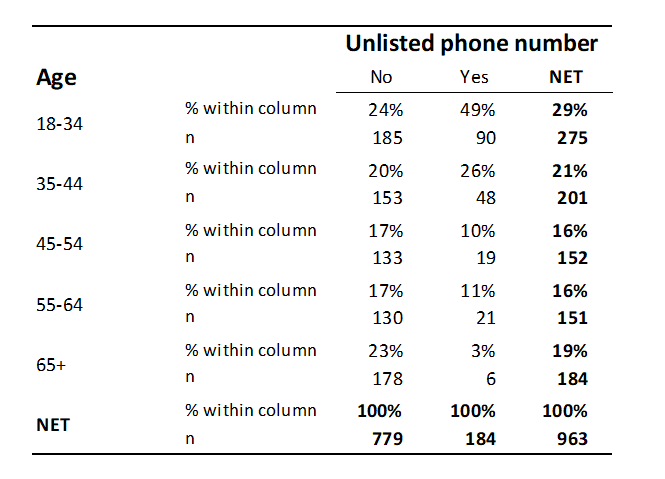

### **Example**

In [88]:
# Create a data frame
teamsDF = pd.DataFrame({
                        'team':     ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                        'position': ['G', 'G', 'F', 'C', 'G', 'F', 'F', 'C'],
                        'points':   [7, 7, 8, 11, 13, 15, 19, 13]})

#view the data frame
teamsDF





,team,position,points
0,A,G,7
1,A,G,7
2,A,F,8
3,A,C,11
4,B,G,13
5,B,F,15
6,B,F,19
7,B,C,13


In [89]:
# We can use the following code to create a crosstab for the position and 
# team variables:

# margins all row and col totals
# teamsTable = pd.crosstab(teamsDF.position, teamsDF.team, margins=False)
teamsTable = pd.crosstab(teamsDF['position'], teamsDF['team'], margins=False)


teamsTable




team,A,B
position,,
C,1,1
F,1,2
G,2,1


### **Interpretation of the above table:**

* There is 1 player who has a position of ‘C’ and belongs to team ‘A’
* There is 1 player who has a position of ‘C’ and belongs to team ‘B’
* There is 1 player who has a position of ‘F’ and belongs to team ‘A’
* There are 2 players who have a position of ‘F’ and belong to team ‘B’
* There are 2 players who have a position of ‘G’ and belong to team ‘A’
* There is 1 player who has a position of ‘G’ and belongs to team ‘B’

## **Back to the Bank Campaign Data**

**Two-way Contingency Table**

In [90]:
# A two-Way contingency table for categorical attributes

# $marital will be rows, $y will be columns
two_way_table = pd.crosstab(bank_data.marital, bank_data.y, margins=True)

two_way_table




y,no,yes,All
marital,,,
divorced,4136,476,4612
married,22396,2532,24928
single,9948,1620,11568
unknown,68,12,80
All,36548,4640,41188


In [91]:
# cell, row, and column percentages

# $marital will be rows, $y will be columns
two_way_table = pd.crosstab(bank_data.marital, bank_data.y,  normalize='all', margins=True)

two_way_table




y,no,yes,All
marital,,,
divorced,0.100418,0.011557,0.111974
married,0.543751,0.061474,0.605225
single,0.241527,0.039332,0.280859
unknown,0.001651,0.000291,0.001942
All,0.887346,0.112654,1.000000


**Three-Way Contingency Table**

In [92]:
# Three-Way contingency table

# Put the first two dimensions in brackets
three_way_table = pd.crosstab([bank_data.marital, bank_data.poutcome], bank_data.y,
                              margins=True, normalize='all')

three_way_table







y                           no       yes       All
marital  poutcome                                 
divorced failure      0.010731  0.001457  0.012188
         nonexistent  0.088812  0.007842  0.096654
         success      0.000874  0.002258  0.003132
married  failure      0.049675  0.008206  0.057881
         nonexistent  0.487909  0.041881  0.529790
         success      0.006167  0.011387  0.017554
single   failure      0.027848  0.005001  0.032849
         nonexistent  0.209139  0.026343  0.235481
         success      0.004540  0.007988  0.012528
unknown  failure      0.000291  0.000024  0.000316
         nonexistent  0.001311  0.000194  0.001505
         success      0.000049  0.000073  0.000121
All                   0.887346  0.112654  1.000000

# **Plotting Crosstab Results**



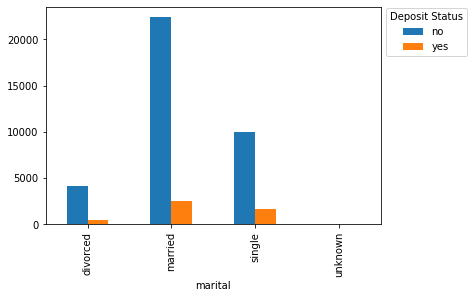

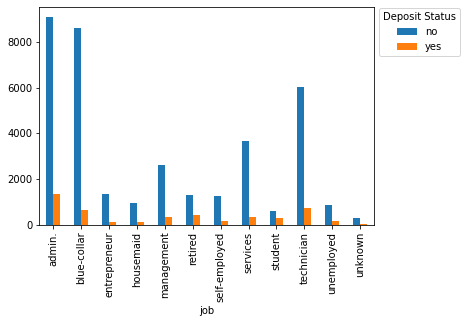

In [93]:
# Let's plot a few things
import matplotlib.pyplot as plt

# $marital will be rows, $y will be columns
two_way_table = pd.crosstab(bank_data.marital, bank_data.y, margins=False)

ax = two_way_table.plot(kind="bar", stacked=False)
ax.legend(title='Deposit Status', bbox_to_anchor=(1, 1.02), loc='upper left')



# $job will be rows, $y will be columns
two_way_table = pd.crosstab(bank_data.job, bank_data.y, margins=False)

ax = two_way_table.plot(kind="bar", stacked=False)
ax.legend(title='Deposit Status', bbox_to_anchor=(1, 1.02), loc='upper left')
   

### **Checking for Missing Values**

* In Python, **None** is **numpy.nan**
* At the base level, pandas offers two functions to test for missing data, **isnull()** and **notnull()**. 
* hese are simple functions that return a boolean value indicating whether the passed in argument value is in fact missing data.

In [94]:
# Does the column 'age' have any missing values?


# same as sum(bank_data.age.isnull())
bank_data.age.isnull().sum()



0

In [95]:
# Are there any columns with missing values?

bank_data.isnull().values.any()




False

### **Excluding Missing Values from Analyses**

* Arithmetic functions on missing values yield missing values.

In [96]:
# Example

import numpy as np

x = np.array([1, 2, np.nan, 3])


# Calculates the mean of array with the NaN values
print(np.mean(x))     # returns NaN


# Calculates the mean of array ignoring the NaN values
print(np.nanmean(x))  # returns 2



nan
2.0


## **pandas.DataFrame.dropna**


* **df.dropna(axis=0)**: Drop the rows where at least one element is missing.
* **df.dropna(axis='columns')**: Drop the columns where at least one element is missing.
* **df.dropna(how='all')**: Drop the rows/columns where all elements are missing.
* **df.dropna(how='any')**: Drop the rows/columns where any elements are missing.
* **df.dropna(inplace=True)**: Keep the DataFrame with valid entries in the same variable


In [97]:
# Nothing needs to be done here
bank_data.dropna(inplace=True)

bank_data.shape




(41188, 21)

# **Adding New Columns**

* When we add a new column to an existing pandas DataFrame, that column is added at the end of the columns: bank_data['ID'] = range(0,41188)

* But, to add a column to the front or elsewhere, we would need another approach

In [98]:
# Add an int ID field to give each row a unique ID

bank_data['ID'] = range(0, 41188)

bank_data.head(10)




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_dx,euribor3m,nr_employed,y,ID
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,8
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,9


In [99]:
# Let's verify the new shape

bank_data.shape





(41188, 22)

In [100]:
# To remove the new column:

bank_data.drop(columns=['ID'], inplace=True)

bank_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_dx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [101]:
# Let's add the new ID coulmn to the front 

bank_data.insert(0, 'ID', range(0, 41188))

bank_data.head(20)



,ID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_dx,euribor3m,nr_employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **Changing Misleading Attribute Values**

* The field **pdays** is a count of the number of days since the client was last contacted from a previous campaign. 
* This field is clearly numeric, so when we 
look at the histogram of days_since_previous most of the data values are near 1000, with a minority of values near zero.
* It turns out that the database administrator used the code 999 to represent customers who had not been contacted previously.
*  So, we need to change the field value 999 to missing.

In [102]:
bank_data.pdays



0        999
1        999
2        999
3        999
4        999
        ... 
41183    999
41184    999
41185    999
41186    999
41187    999
Name: pdays, Length: 41188, dtype: int64

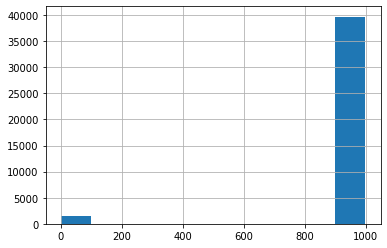

In [103]:
bank_data.pdays.hist()



* We need to identify each instance of 999 in the **pdays** variable, 
and replace it with NaN

In [104]:
# Replace all 999's by NaN

import numpy as np

bank_data.pdays = bank_data.pdays.replace({999: np.nan})




In [105]:
# How many missing values are there now?

bank_data.pdays.isnull().sum()




39673

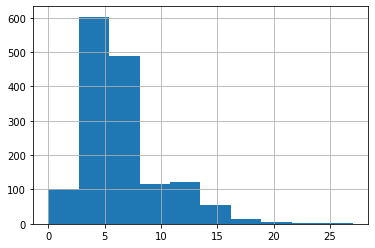

In [106]:
# Redo the histogram

bank_data.pdays.hist() 
       




## **Reexpression of Categorical Data as Numeric**

* The following shows a bar graph of the **education** field. 
* Note that the field is categorical, meaning that there is no ordering of the field values. 
* In other words, if we left the field as it is, then our data science algorithms would not know that university_ degree represents more education than basic.4yr. 
* To provide this information to our
algorithms, we transform the data values into numeric values, where it is clear that one value is larger than another. 
* One needs to proceed with care when doing this, so that the relative differences among the various categories are preserved.

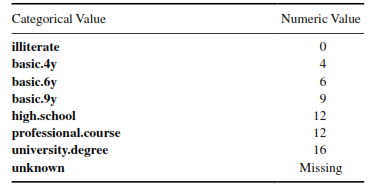

In [107]:
# What are the distinct educational levels?


# Method #1
# compare to bank_data.education.value_counts(normalize=True)
# compare to bank_data.education.value_counts(dropna=False)
#bank_data.education.value_counts()


# Method #2
pd.factorize(bank_data['education'], sort=True)


# Method #3
#np.unique(bank_data.education)






(array([0, 3, 3, ..., 6, 5, 5]),
 Index(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype='object'))

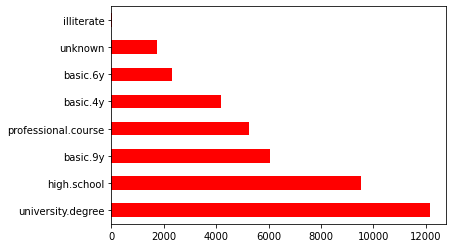

In [108]:
# Do a bar graph of the educational levels


bank_data.education.value_counts().plot.barh(y='education', color="red")


  

* We now need to specify which values of education go with which numeric values following the rules specified before.

* We need to set up a dictionary specifically for converting the categorical
values in the education_numeric variable to numeric values. 
* The dictionary is contained in curly brackets, { }, to set up our dictionary, as follows.
* Note that inside the dictionary, we use **education_numeric** to specify the variable which we want to recode, followed by a colon and another set of curly brackets.
* Within this second set of curly brackets, we specify the recoding in the following order:

In [109]:
# Use the same conversion table shown before

# create a new numeric column
bank_data['education_numeric'] = bank_data['education']


# save the replacament rules in a dictionary
edu_num = {"education_numeric": {"illiterate": 0,
                                 "basic.4y": 4, "basic.6y": 6,   "basic.9y": 9, 
                                 "high.school":12, "professional.course": 12, 
                                 "university.degree":16,
                                 "unknown": np.NaN}}

# apply the rule and replace the values
bank_data.replace(edu_num, inplace=True)





In [110]:
# Let's check for missing values

bank_data.education_numeric.isnull().sum()




1731

In [111]:
# Display the numeric values for the new column

bank_data['education_numeric'].value_counts(dropna=False)




12.0    14758
16.0    12168
9.0      6045
4.0      4176
6.0      2292
NaN      1731
0.0        18
Name: education_numeric, dtype: int64

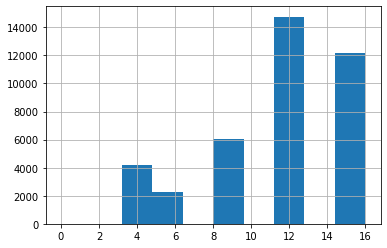

In [112]:
# The histogram of the reexpressed education field as numeric

bank_data.education_numeric.hist()




# **Standardizing the Numeric Fields**


* Certain algorithms perform better when the numeric fields are standardized so that the attribute mean equals 0 and the attribute standard deviation equals 1

* Positive z‐values may be interpreted as representing the number of standard
deviations above the mean the data value lies, while negative z‐values represent the number of standard deviations below the mean. 
* Some analysts standardize all their numeric fields as a matter of course. 

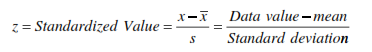

### **The scipy.stats.zscore Function**

* Compute the z score of each value in the sample, relative to the sample mean and standard deviation.



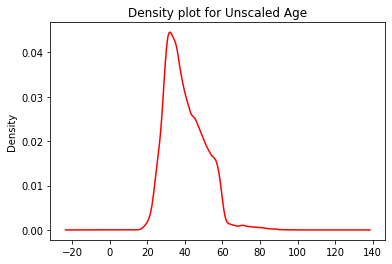

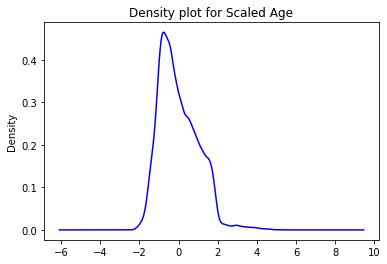

In [116]:
from scipy import stats
import matplotlib.pyplot as plt


bank_data['scaled_age'] = stats.zscore(bank_data.age, nan_policy='omit')

bank_data.age.plot.density(color="red")
plt.title('Density plot for Unscaled Age')
plt.show()


bank_data.scaled_age.plot.density(color="blue")
plt.title('Density plot for Scaled Age')
plt.show()




### **The MinMax Scaler**

* The **sklearn** library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
* It is the tightly knit to scientific Python packages such as numpy, scipy, matplotlib, etc.





In [117]:
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler


min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

standard_scaler.fit_transform(np.array(bank_data.duration).reshape(-1,1))



array([[ 0.01047142],
       [-0.42150051],
       [-0.12451981],
       ...,
       [-0.26722482],
       [ 0.70856893],
       [-0.07438021]])

## **Imputing Missing Values**

* The **sklearn.impute.SimpleImputer** class provides basic strategies for imputing missing values. 
* Missing values can be imputed with a provided constant value, or using the statistics (**mean**, **median** or **most frequent**) of each column in which the missing values are located. 
* This class also allows for different missing values encodings.



### Are there any missing **pdays** values?
*  Number of days since last contact

In [115]:
# Load the imputer package
from sklearn.impute import SimpleImputer


# also try mean or most_frequent
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

bank_data.pdays = imputer.fit_transform(bank_data['pdays'].values.reshape(-1,1))[:,0]

print(bank_data.pdays)


0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
41183    6.0
41184    6.0
41185    6.0
41186    6.0
41187    6.0
Name: pdays, Length: 41188, dtype: float64


# **Identifying Outliers**

* Once the numeric fields are standardized, one may use the **z‐values** to identify
outliers, which are extreme values along a particular dimension or
dimensions. 

* E.g., Consider the field **campaign**, which represents
the number of customer contacts made over the course of the marketing campaign.

* The mean number of contacts per customer is 2.6, with a standard deviation
of 2.7 (allowing for rounding).


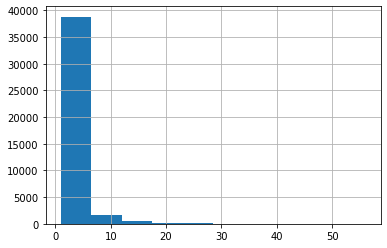

In [118]:
bank_data.campaign.hist()



In [131]:
# Compute the basis stats for bank_data.campaign

bank_data['campaign'].describe()


count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

### **Three-Sigma Rule of Thumb**

* A common method to define outliers is the **3 times the standard deviation** 


* So, we obtain the standardized field as **z_score = ($campaign - 2.6)/2.7**

* The rough rule of thumb is that a data value is **an outlier if its z‐value is either greater than 3, or less than −3**. 
* For instance, for a customer who had been contacted 10 times, we would have standardized value (10 - 2.6)/2.7 = 2.7
* 10 contacts is not identified as an outlier using this method since 2.7 < 3.


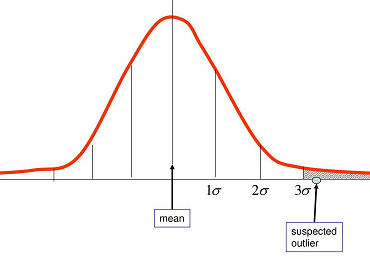


**NOTE**

* The data scientist should consult with the client regarding what they
would like to do with any outliers. 
* Outliers should not be automatically removed nor should they be automatically changed. 
* Their unusual values may bring to light important aspects of the data that should be discussed with the client or with the database administrator.

### **How to Identify Outliers**

* For this example, we will use the **$scaled_age** variable that we created in the previous section. 

* We can isolate individual records using bracket notation detailed
in the previous chapter. 

* The structure of our code will begin as follows **bank_data[ rows of interest, ]**

* We now need to fill in which rows we are interested in. 

* We will find outliers by using the **query()** function, which identifies
rows that meet a particular condition.


In [134]:
# Recall we standard-scaled column 'age' before

bank_data['scaled_age'].describe()



count    4.118800e+04
mean     2.846557e-16
std      1.000012e+00
min     -2.209365e+00
25%     -7.699804e-01
50%     -1.942267e-01
75%      6.694038e-01
max      5.563310e+00
Name: scaled_age, dtype: float64

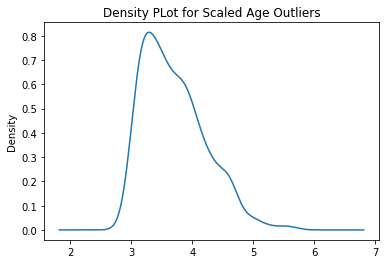

In [152]:
# Determine the outliers using the three sigma rule for the scaled_age attribute

#bank_data_outliers = bank_data.query('~(scaled_age > 3 | scaled_age < -3)')['scaled_age']
bank_data_outliers = bank_data.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']

bank_data_outliers.plot.density()
plt.title('Density PLot for Scaled Age Outliers')
plt.show()






# **References**

* Data Science Using Python and R, Larose and Larose, Wiley, 2019
* https://www.kaggle.com/sahistapatel96/bankadditionalfullcsv
* https://www.statmethods.net/stats/frequencies.html
* https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html









